In [30]:
import tensorflow as tf
import matplotlib as mpl
#importing backend from keras for precision
from keras import backend as K

This is my own Customized layer that I am adding to the model

In [20]:
myLayer = tf.keras.layers.Lambda(lambda x: (x*1.0000001))

This is my customized metric that I am adding to the model

In [31]:
def myMetric(y_true, y_pred):
    y_pred_binary = tf.round(y_pred)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred_binary), tf.float32))
    return accuracy

Model 2.1: I will now add more layers which will be the custom layer I created above. And I will use the custom metric I created above when I compile.

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_164 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_26 (Ba  (None, 300)               1200      
 tchNormalization)                                               
                                                                 
 dense_165 (Dense)           (None, 250)               75250     
                                                                 
 dense_166 (Dense)           (None, 200)               50200     
                                                                 
 dropout_26 (Dropout)        (None, 200)               0         
                                                     

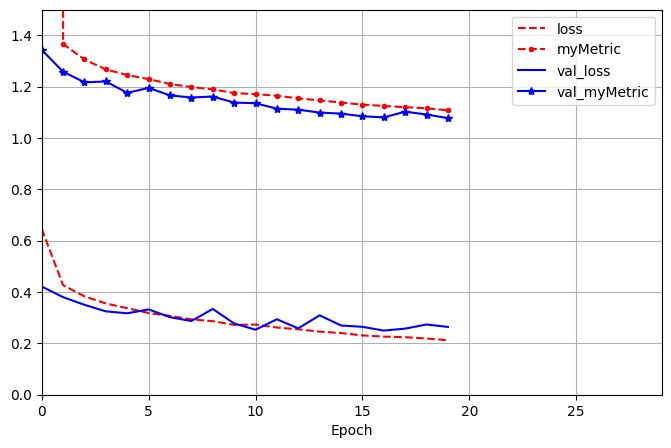

In [41]:
#Step 1 - Import the data
#Also split the data into training and test sets, also hold out the last 5000 images from training/testing
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000]

#Step 2 - Create the neural net structure
#get_layer() and get_weights() to see layers and weight
tf.random.set_seed(42)
model2_1 = tf.keras.Sequential()
model2_1.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model2_1.add(tf.keras.layers.Flatten())
model2_1.add(tf.keras.layers.Dense(300, activation="relu"))
#batch normalization layer moved and moved another hidden layer between batch and dropout
model2_1.add(tf.keras.layers.BatchNormalization())
model2_1.add(tf.keras.layers.Dense(250, activation="relu"))
model2_1.add(tf.keras.layers.Dense(200, activation="relu"))
#dropout layer moved
model2_1.add(tf.keras.layers.Dropout(.2))
#more hidden layers
model2_1.add(tf.keras.layers.Dense(150, activation="relu"))
#added this layer
model2_1.add(myLayer)
model2_1.add(tf.keras.layers.Dense(50, activation="relu"))
model2_1.add(myLayer)
model2_1.add(tf.keras.layers.Dense(10, activation="softmax"))

model2_1.summary()

#Step 3 - Compile the model
#using myMetric which is the custom metric I created
model2_1.compile(loss="sparse_categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics=[myMetric])

#Step 4 - Train and evaluate model, epoch was 30 shortened to 20 for speed
history2_1 = model2_1.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed (STOP HERE BASED ON ASSIGNMENT REQS)
mse_test, rmse_test = model2_1.evaluate(X_test, y_test)

#Step 6 - Visualize the data
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2_1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1.5], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()